In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("Kyoto_Restaurant_Info.csv", index_col=0)
df = pd.read_csv("Resources/Kyoto_Restaurant_Info.csv")

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# df = df.drop(columns=['Unnamed: 0'])
# del df['Unnamed: 0']
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head(2)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857


In [4]:
len(df)

895

In [5]:
# Drop any row with Nan
df.dropna(inplace=True)
print(len(df))
df.head()

398


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
4,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
5,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559
6,Resort dining&bar HaLe,Resort dining&bar HaLe 河原町店,Sanjo,Italian,Bar,￥3000～￥3999,￥1000～￥1999,3.04,3.05,3.00,22,35.007195,135.769468


In [6]:
kyoto_df = df.reset_index(drop=True, inplace=False)
kyoto_df.head(4)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202
3,okuta-va,OCTAVAR,Kyoto,Bar,Italian,￥4000～￥4999,￥1000～￥1999,3.08,3.00,3.11,24,34.983497,135.760559


In [7]:
for index in range(len(kyoto_df["FirstCategory"])):   
    print(f"index:{index} - {kyoto_df.loc[index]['FirstCategory']}  |||  {kyoto_df.loc[index]['SecondCategory']}")

index:0 - Buffet style  |||  Cafe
index:1 - Bistro  |||  Steak
index:2 - Chinese hot pot / fire pot  |||  Chinese
index:3 - Bar  |||  Italian
index:4 - Italian  |||  Bar
index:5 - French  |||  Italian
index:6 - Italian  |||  French
index:7 - Izakaya (Tavern)  |||  Nihonshu (Japanese sake)
index:8 - Izakaya (Tavern)  |||  Seafood
index:9 - Pork Shabu Shabu  |||  Shabu Shabu (Japanese Steamboat)
index:10 - Izakaya (Tavern)  |||  Yakitori (Grilled chicken)
index:11 - Italian  |||  Western Cuisine
index:12 - Yakiniku (BBQ Beef)  |||  Sukiyaki
index:13 - Bistro  |||  Bar
index:14 - Italian  |||  Pasta
index:15 - Izakaya (Tavern)  |||  Creative cuisine
index:16 - Tempura  |||  Kaiseki (Traditional Japanese)
index:17 - Italian  |||  Pizza
index:18 - Dining bar  |||  Steak
index:19 - Izakaya (Tavern)  |||  Creative cuisine
index:20 - Buffet style  |||  Cafe
index:21 - Kaiseki (Traditional Japanese)  |||  Kyoto Cuisine
index:22 - Chinese  |||  Dim sum
index:23 - Kyoto Cuisine  |||  Kaiseki (Tra

In [8]:
searchfor = ["Italian","French","Spain","Bar","Traditional Café","Pizza","European","Pasta","Beef dishes"]

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="European"
kyoto_df.head(1)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.2,3.38,56,34.986175,135.761314,NaN


In [9]:
import itertools 

searchfor = []
search1 = ["Buffet","Chinese","Izakaya","Tempura","Kyoto","Korean","Viet","Kappo","Sushi","Tsukemen","Kappo"]
search2 = ["Kaiseki","Okonomiyaki","Pork","Yakiniku","eel","Sichuan","Shanghai","Sweets","Udon","Kushi-age"]
search3 = ["Kushi","Thailand","Tofu","Ryokan","Shabu","Yakitori","Okinawan","Crab","Creative","Noodle","soba","Soba"]
search4 = ["Blowfish","Seafood","Ramen","Japanese","India","other","Robatayaki","Oyako-don","Cantonese","Parfait"]
search5 = ["Innovative"]

searchfor = list(itertools.chain(search1,search2,search3,search4,search5))

kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="Asian"
kyoto_df.head(1)


,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.2,3.38,56,34.986175,135.761314,Asian


In [10]:
search1 = ["Steak","Beer bar","Bistro","Teppanyaki","Dining","Cafe","Western","Beer","Mexico","Crepes","Pancake"]
search2 = ["Bread","Mexico","Bread","table d'hôte"]

searchfor = list(itertools.chain(search1,search2))


kyoto_df.loc[kyoto_df["FirstCategory"].str.contains('|'.join(searchfor))==True, "Region"]="American"
kyoto_df.head(1)

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region
0,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.2,3.38,56,34.986175,135.761314,Asian


In [11]:
# To make sure no value in "FirstCategory" is not assigned to any of three regions.
kyoto_df[kyoto_df['Region'].isin(["Asian","European","American"])==False]

,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Region


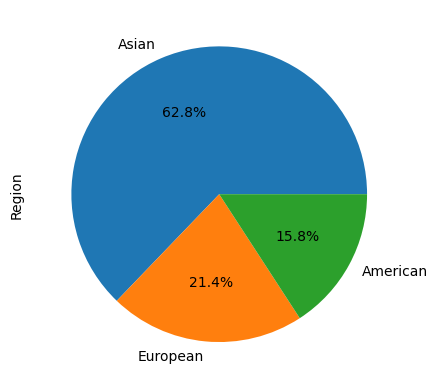

In [12]:
counts = kyoto_df.Region.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

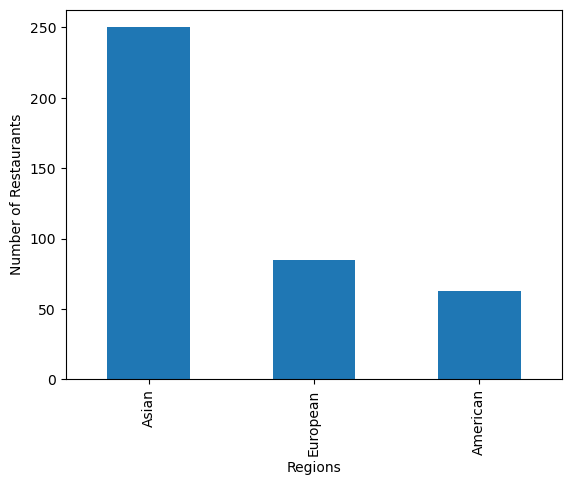

In [13]:
counts = kyoto_df['Region'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Regions")
plt.xticks(rotation=90)
plt.ylabel("Number of Restaurants")
plt.show()